# 1. Préliminaires

## 1.1. Importations

Importons les bibliothèques :

In [1]:
# Data
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# BOW
from sklearn.feature_extraction.text import CountVectorizer

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# TSNE
from sklearn.manifold import TSNE

# K-means
from sklearn.cluster import KMeans, MiniBatchKMeans

# ARI
from sklearn.metrics.cluster import adjusted_rand_score

# Label encoder
from sklearn.preprocessing import LabelEncoder

# Matrice de confusion
from sklearn.metrics import confusion_matrix

# Word embedding
import gensim
import tensorflow as tf
import tensorflow_text as tf_text
import tensorflow_hub as hub

# SIFT
import cv2

# CNN
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Assurons-nous d'avoir les données NLTK nécessaires :

In [2]:
# Téléchargement des données NLTK nécessaires
nltk.download('stopwords')
nltk.download('wordnet')
# La sortie indiquera si la ressource est déjà à jour ou si elle est en train de la télécharger

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mauri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mauri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Chargeons les données :

In [3]:
raw = pd.read_csv('Flipkart/flipkart_com-ecommerce_sample_1050.csv')

## 1.2. Présentation des données

Forme du tableau :

In [4]:
raw.shape

(1050, 15)

Tête du tableau (5 premières lignes) :

In [5]:
raw.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

Proportions de valeurs manquantes par variable :

In [6]:
raw.isna().mean().sort_values(ascending=False)

brand                      0.321905
product_specifications     0.000952
discounted_price           0.000952
retail_price               0.000952
overall_rating             0.000000
product_rating             0.000000
description                0.000000
is_FK_Advantage_product    0.000000
image                      0.000000
pid                        0.000000
product_category_tree      0.000000
product_name               0.000000
product_url                0.000000
crawl_timestamp            0.000000
uniq_id                    0.000000
dtype: float64

Nombre de doublons :

In [7]:
raw.duplicated().sum()

0

Type des variables :

In [8]:
raw.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

# 2. Filtrage

Nous souhaitons réaliser une étude de faisabilité d'un moteur de classification d'articles, basé sur une image et une description, pour l'automatisation de l'attribution de la catégorie de l'article.

Par conséquent, nous allons sélectionner les variables suivantes :
- product_name
- product_category_tree
- image
- description

In [9]:
df = raw[['product_name', 'product_category_tree', 'image', 'description']]
df.head()

product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >>...   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   

                                  image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                         description  
0  Key Features of Elegance Polyester Multicolor ...  
1  Specifications of Sathiyas Cotton Bath Towel (...  
2  Key Features of Eurospa Cotton Terry Face Towe...  
3  Key Features of SANTOSH ROYAL FASHION Cotton P...  
4  Key Features of Jaipur Print Cotton Floral Kin...

# 3. Feature engineering

Pour faciliter les analyses textuelles, nous allons concaténer en une unique colonne les textes des variables :
- product_name
- description

Nous nommerons la nouvelle colonne "name_and_description" et elle représentera notre corpus.

In [10]:
df['name_and_description'] = df['product_name'] + ' ' + df['description']
df.drop(labels=['product_name', 'description'], axis=1, inplace=True)
df.head()

C:\Users\mauri\.conda\envs\pro6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mauri\.conda\envs\pro6\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >>...   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   

                                  image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                name_and_description  
0  Elegance Polyester Multicolor Abstract Eyelet ...  
1  Sathiyas Cotton Bath Towel Specifications of S...  
2  Eurospa Cotton Terry Face Towel Set Key Featur...  
3  SANTOSH ROYAL FASHION Cotton Printed King size...  
4  Jaipur Print Cotton Floral King sized Double B...

Les produits sont classés en catégories et en sous-catégories. Regardons par exemple le chemin de classification du premier produit :

In [11]:
print(df['product_category_tree'][0])

["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]


Afin de simplifier nos analyses, nous allons seulement considérer la première catégorie (catégorie la plus haute) de chaque produit. Pour cela, définissons la fonction suivante :

In [12]:
def first_category(string):
    # Chaîne de caractères vide pour enregistrer les caractères de la première catégorie
    category = ''
    
    # Pour chaque caractère
    for ch in string:
        # Sortie de la boucle si le caractère est >
        if ch == '>':
            break
        # Enregistrement du caractère s'il n'est pas [ ou "
        else:
            if ch not in '["':
                category += ch
    
    # Renvoi de la chaîne de caractères enregistrée (première catégorie)
    # [:-1] pour ne pas prendre en compte l'espace en bout de chaîne
    return category[:-1]

In [13]:
df['product_category_tree'] = df['product_category_tree'].apply(first_category)
df = df.rename(columns={'product_category_tree': 'category'})
df.head()

C:\Users\mauri\.conda\envs\pro6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


category                                 image  \
0  Home Furnishing  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1        Baby Care  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2        Baby Care  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  Home Furnishing  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  Home Furnishing  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                name_and_description  
0  Elegance Polyester Multicolor Abstract Eyelet ...  
1  Sathiyas Cotton Bath Towel Specifications of S...  
2  Eurospa Cotton Terry Face Towel Set Key Featur...  
3  SANTOSH ROYAL FASHION Cotton Printed King size...  
4  Jaipur Print Cotton Floral King sized Double B...

Dans le but de faciliter nos analyses, ajoutons le chemin au nom des fichiers images :

In [14]:
df['image'] = df['image'].apply(lambda x: 'Flipkart/Images/' + x)
df = df.rename(columns={'image': 'image_path'})
df.head()

category                                         image_path  \
0  Home Furnishing  Flipkart/Images/55b85ea15a1536d46b7190ad6fff8c...   
1        Baby Care  Flipkart/Images/7b72c92c2f6c40268628ec5f14c6d5...   
2        Baby Care  Flipkart/Images/64d5d4a258243731dc7bbb1eef49ad...   
3  Home Furnishing  Flipkart/Images/d4684dcdc759dd9cdf41504698d737...   
4  Home Furnishing  Flipkart/Images/6325b6870c54cd47be6ebfbffa620e...   

                                name_and_description  
0  Elegance Polyester Multicolor Abstract Eyelet ...  
1  Sathiyas Cotton Bath Towel Specifications of S...  
2  Eurospa Cotton Terry Face Towel Set Key Featur...  
3  SANTOSH ROYAL FASHION Cotton Printed King size...  
4  Jaipur Print Cotton Floral King sized Double B...

Pour finir, réalisons une inspection de notre tableau après avoir effectué notre feature engineering :

In [15]:
df.shape

(1050, 3)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   category              1050 non-null   object
 1   image_path            1050 non-null   object
 2   name_and_description  1050 non-null   object
dtypes: object(3)
memory usage: 24.7+ KB


In [17]:
for i in ['image_path', 'name_and_description']:
    print(f'Number of duplicates in {i}: {df.duplicated(subset=i).sum()}')

Number of duplicates in image_path: 0
Number of duplicates in name_and_description: 0


Exportons le résultat de notre feature engineering :

In [18]:
df.to_csv('Flipkart/df_cleaned.csv', index=False)

# 4. Analyse exploratoire

## 4.1. Catégories

In [19]:
df['category'].value_counts()

Baby Care                     150
Kitchen & Dining              150
Watches                       150
Home Furnishing               150
Home Decor & Festive Needs    150
Computers                     150
Beauty and Personal Care      150
Name: category, dtype: int64

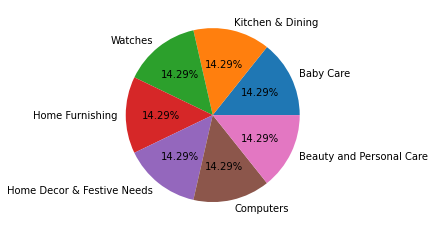

In [20]:
plt.pie(x=df['category'].value_counts(),
        labels=df['category'].value_counts().index,
        autopct='%1.2f%%')
plt.show()

Nous avons un total de 7 catégories qui présentent toutes 150 individus.

## 4.2. Images 

In [21]:
def show_images(images, n, figsize):
    """
    Affiche les n premières images.

    Positional arguments :
    -------------------------------------
    images : array-like : Liste contenant les chemins des images.
    n : int : Nombre d'images à afficher.
    figsize : tuple : Dimensions de la figure (largeur, hauteur) en pouces.
    """
    
    # Taille de la figure
    fig, axes = plt.subplots(nrows=1, ncols=n, figsize=figsize)

    # Images
    for i in range(n):
        img = plt.imread(images.iloc[i])
        axes[i].imshow(img)

    # Ajustement de l'espacement entre les plots
    fig.tight_layout()

    # Affichage
    plt.show()

**Watches**

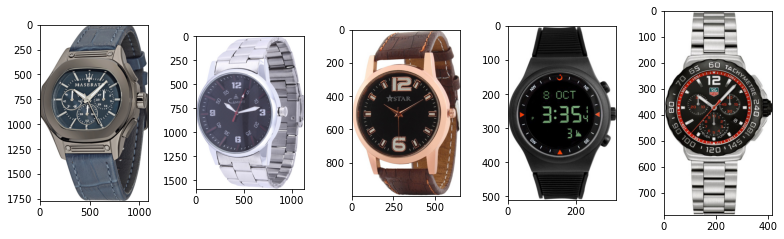

In [22]:
# Images de la catégorie "Watches"
images = df.loc[df['category'] == 'Watches', 'image_path']

show_images(images=images, n=5, figsize=(11, 9))

**Baby Care**

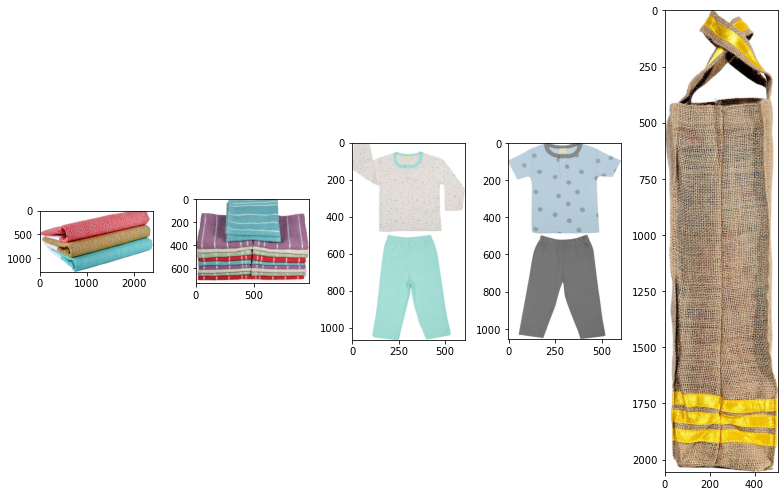

In [23]:
# Images de la catégorie "Baby Care"
images = df.loc[df['category'] == 'Baby Care', 'image_path']

show_images(images=images, n=5, figsize=(11, 9))

**Home Furnishing**

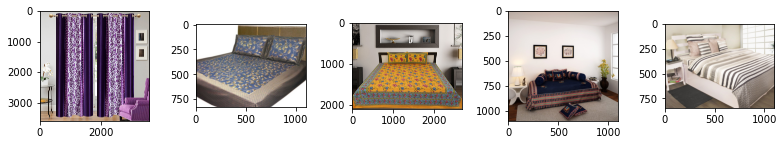

In [24]:
# Images de la catégorie "Home Furnishing"
images = df.loc[df['category'] == 'Home Furnishing', 'image_path']

show_images(images=images, n=5, figsize=(11, 9))

**Computers**

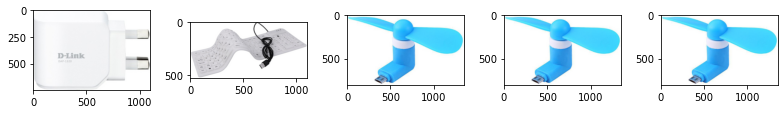

In [25]:
# Images de la catégorie "Computers"
images = df.loc[df['category'] == 'Computers', 'image_path']

show_images(images=images, n=5, figsize=(11, 9))

**Kitchen & Dining**

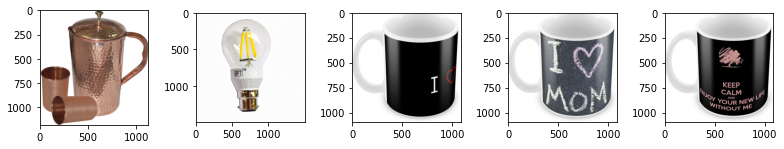

In [26]:
# Images de la catégorie "Kitchen & Dining"
images = df.loc[df['category'] == 'Kitchen & Dining', 'image_path']

show_images(images=images, n=5, figsize=(11, 9))

**Home Decor & Festive Needs**

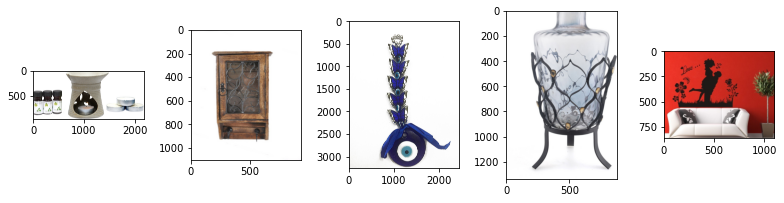

In [27]:
# Images de la catégorie "Home Decor & Festive Needs"
images = df.loc[df['category'] == 'Home Decor & Festive Needs', 'image_path']

show_images(images=images, n=5, figsize=(11, 9))

**Beauty and Personal Care**

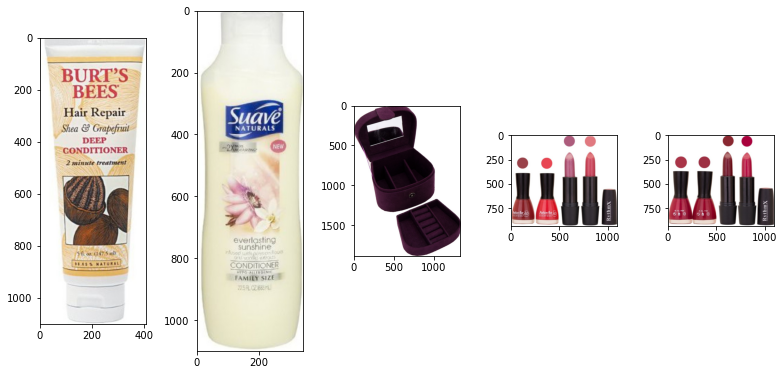

In [28]:
# Images de la catégorie "Beauty and Personal Care"
images = df.loc[df['category'] == 'Beauty and Personal Care', 'image_path']

show_images(images=images, n=5, figsize=(11, 9))

## 4.3. Corpus

In [29]:
def plot_hist_box(x, bins, density):
    """
    Affiche l'histogramme et le box plot d'une variable.

    Positional arguments :
    -------------------------------------
    x : array-like : Variable à représenter.
    bins : int : Nombre de classes à utiliser par l'histogramme.
    density : bool : Si True, renvoie une densité de probabilité par classe. Sinon, renvoie l'effectif par classe.
    """
    
    # Taille de la figure
    fig, axes = plt.subplots(nrows=2, ncols=1,
                             gridspec_kw={'height_ratios': [4, 1]}, figsize=(10, 8))

    # Histogramme
    axes[0].hist(x=x, bins=bins, density=density)
    if density == True:
        axes[0].set_ylabel('Densité', fontsize=12)
    else:
        axes[0].set_ylabel('Effectif', fontsize=12)
    axes[0].grid()

    # Box plot
    axes[1].boxplot(x=x, showmeans=True,
                    widths=0.5, vert=False)
    axes[1].set_yticks([])
    axes[1].grid(axis='x')

    # Affichage
    plt.show()

**Caractères par document**

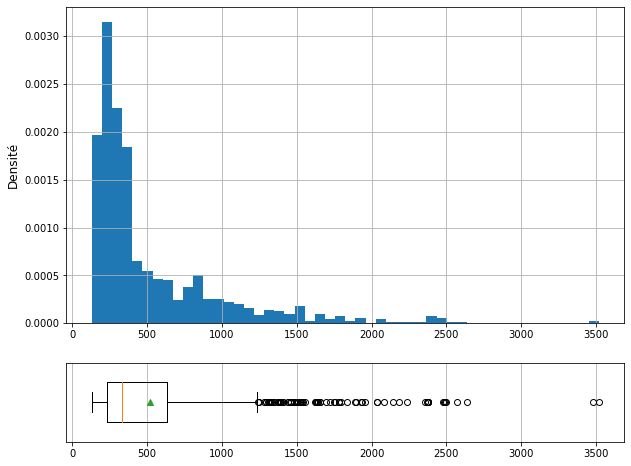

In [30]:
# Nombre de caractères par document
ch_len = df['name_and_description'].str.len()

# Figure
plot_hist_box(x=ch_len, bins=50, density=True)

In [31]:
ch_len.describe().round(2)

count    1050.00
mean      519.92
std       461.28
min       131.00
25%       233.00
50%       336.00
75%       636.00
max      3519.00
Name: name_and_description, dtype: float64

In [32]:
# Skewness empirique
ch_len.skew().round(2)

2.33

La distribution du nombre de caractères par document est asymétrique. Elle est étalée à droite. Elle présente plusieurs valeurs atypiques élevées.

**Mots par document**

Pour obtenir le nombre de mots par document, effectuons un simple split (c'est-à-dire séparons les chaînes de caractères au niveau des espaces) :

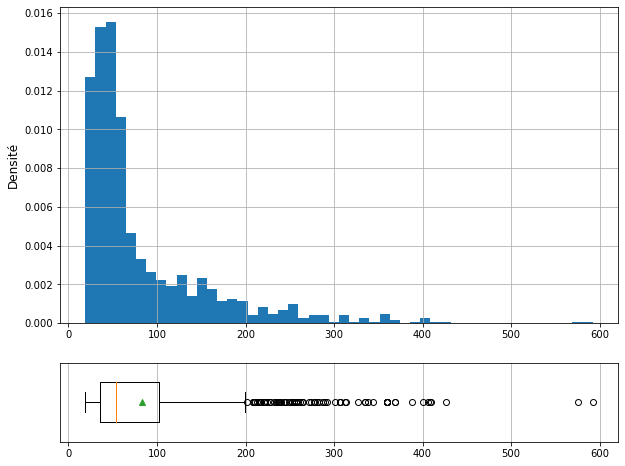

In [33]:
# Nombre de mots par document
words = df['name_and_description'].apply(lambda x : x.split())
words_len = words.str.len()

# Figure
plot_hist_box(x=words_len, bins=50, density=True)

In [34]:
words_len.describe().round(2)

count    1050.00
mean       83.47
std        75.19
min        19.00
25%        36.00
50%        54.00
75%       102.00
max       592.00
Name: name_and_description, dtype: float64

In [35]:
# Skewness empirique
words_len.skew().round(2)

2.31

La forme de la distribution du nombre de mots par document est similaire à celle du nombre caractères par document. Cependant l'amplitude de la distribution ci-dessus est plus petite.

# 5. Textes

## 5.1. Prétraitement

In [36]:
def preprocess_corpus(corpus, lemmatize):
    """
    Nettoie et normalise tous les documents d'un corpus.
    Pour chaque document, renvoie une liste de tokens.

    Positional arguments :
    -------------------------------------
    corpus : array-like : Liste de documents (corpus).
    lemmatize : bool : Si True, lemmatise les tokens. Sinon, racinise.
    """
    
    # Liste vide pour enregistrer les tokens
    tokens_list = []

    for doc in corpus:
        # Mise en minuscule
        doc = doc.lower()

        # Tokenisation (et suppression de la ponctuation)
        tokens = RegexpTokenizer(r'\w+').tokenize(doc)

        # Suppression des stopwords
        tokens = [w for w in tokens if w not in stopwords.words('english')]

        # Conservation des tokens constitués d'au moins 2 caractères
        tokens = [w for w in tokens if len(w) >= 2]

        # Conservation des tokens entièrement constitués de caractères alphabétiques
        tokens = [w for w in tokens if w.isalpha()]

        if lemmatize==True:
            # Lemmatisation
            tokens = [WordNetLemmatizer().lemmatize(i) for i in tokens]
        else:
            # Racinisation
            tokens = [PorterStemmer().stem(i) for i in tokens]

        # Enregistrement des tokens après nettoyage et normalisation
        tokens_list.append(tokens)

    return tokens_list

**Tokens par document**

In [37]:
# Liste de tokens par document après prétraitement
tokens_list = preprocess_corpus(corpus=df['name_and_description'], lemmatize=True)

In [38]:
# 10 premiers tokens du premier document
tokens_list[0][:10]

['elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'key',
 'feature',
 'elegance']

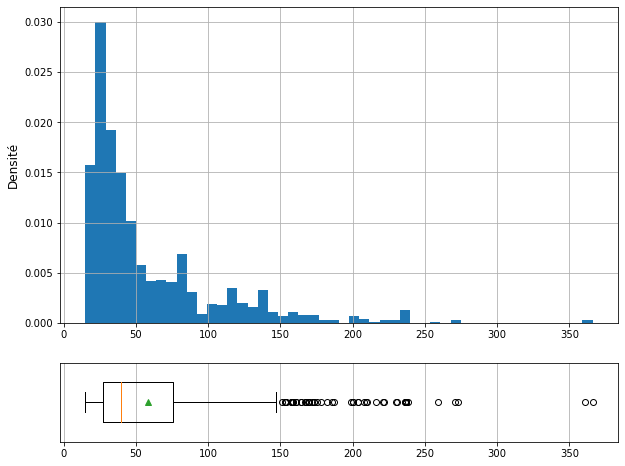

In [39]:
# Nombre de tokens par document
tokens_len = [len(tokens) for tokens in tokens_list]

# Figure
plot_hist_box(x=tokens_len, bins=50, density=True)

In [40]:
pd.Series(tokens_len).describe().round(2)

count    1050.00
mean       58.40
std        47.82
min        15.00
25%        27.00
50%        39.50
75%        76.00
max       366.00
dtype: float64

In [41]:
# Skewness empirique
pd.Series(tokens_len).skew().round(2)

2.13

La distribution du nombre de tokens par document est similaire à celle du nombre de mots par document. Néanmoins, l'amplitude de la distribution ci-dessus est plus faible.

**Reconstruction des documents prétraités**

Pour reconstruire les documents après prétraitement, nous allons simplement joindre les tokens de chaque document par des espaces.

In [42]:
# Liste de documents prétraités
doc_list = [' '.join(tokens) for tokens in tokens_list]

Comparaison du premier document avant et après prétraitement : 

In [43]:
print('Document de base :')
print(df['name_and_description'][0])
print('')
print('Document nettoyé et normalisé :')
print(doc_list[0])

Document de base :
Elegance Polyester Multicolor Abstract Eyelet Door Curtain Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Brin

En conclusion, notre prétraitement semble s'être bien réalisée. Nous avons à notre disposition 2 listes représentant notre corpus prétraité :
- `doc_list` : les documents prétraités, stockés dans une liste
- `tokens_list` : les tokens de chaque document après prétraitement, stockés dans une liste

Pour la suite, nous choisirons l'une ou l'autre en fonction des entrées demandées par les algorithmes que nous utiliserons.

## 5.2. Feature extraction et analyse

Créons une Series dans le but d'enregistrer l'indice de Rand ajusté (ARI) de chacune de nos approches :

In [44]:
ari_ser = pd.Series(name='Adjusted Rand Index', dtype='float64')

### 5.2.1. Bag-of-words

**Essai sur un document**

Reprenons à titre d'exemple le premier document :

In [45]:
# Instanciation du vectoriseur 
vectorizer = CountVectorizer()

# Vectorisation du premier document
X = vectorizer.fit_transform([doc_list[0]])

# Conversion en DataFrame
bag_of_words = pd.DataFrame(
    data=X.toarray(), columns=vectorizer.get_feature_names())
bag_of_words.shape

(1, 101)

In [46]:
bag_of_words

abstract  amount  ant  anti  apart  apparance  appeal  attention  beauty  \
0         5       1    1     1      1          1       1          1       1   

   body  ...  surreal  thing  type  valance  want  welcome  whole  wish  \
0     1  ...        1      1     1        1     1        1      1     1   

   world  wrinkle  
0      1        1  

[1 rows x 101 columns]

Nous avons bien un comptage de chaque mot présent dans le document.

**Corpus**

In [47]:
# Instanciation du vectoriseur
vectorizer = CountVectorizer(
    min_df=2)  # Les mots présents moins de 2 fois dans le corpus seront ignorés

# Vectorisation du corpus
X = vectorizer.fit_transform(doc_list)

# Conversion en DataFrame
bag_of_words = pd.DataFrame(
    data=X.toarray(), columns=vectorizer.get_feature_names())
bag_of_words.shape

(1050, 2074)

In [48]:
bag_of_words.head()

aa  aapno  ability  able  abode  absorbency  absorbent  abstract  ac  \
0   0      0        0     0      0           0          0         5   0   
1   0      0        0     0      0           0          0         0   0   
2   0      0        0     0      0           1          0         0   0   
3   0      0        0     0      0           0          0         0   0   
4   0      0        0     0      0           0          0         0   0   

   accent  ...  yet  york  young  youth  youthful  yuva  zero  zipper  zone  \
0       0  ...    0     0      0      0         0     0     0       0     0   
1       0  ...    0     0      0      0         0     0     0       0     0   
2       0  ...    0     0      0      0         0     0     0       0     0   
3       0  ...    0     0      0      0         0     0     0       0     0   
4       0  ...    0     0      0      0         0     0     0       0     0   

   zyxel  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 2074 columns]

Les colonnes représentent les mots présents dans le corpus entier. Or, en comptant pour chaque document l'occurrence de ces mots, nous obtenons une matrice creuse. En effet, nous avons beaucoup de 0.

Examinons les 20 mots/tokens les plus occurrents dans le corpus :

In [49]:
word_occurences = bag_of_words.sum(axis=0).sort_values(ascending=False)
word_occurences[:20]

product        866
cm             677
free           622
buy            582
replacement    568
delivery       567
shipping       564
cash           564
genuine        564
price          561
day            556
mug            533
watch          506
flipkart       481
com            473
guarantee      471
set            446
baby           415
feature        404
online         396
dtype: int64

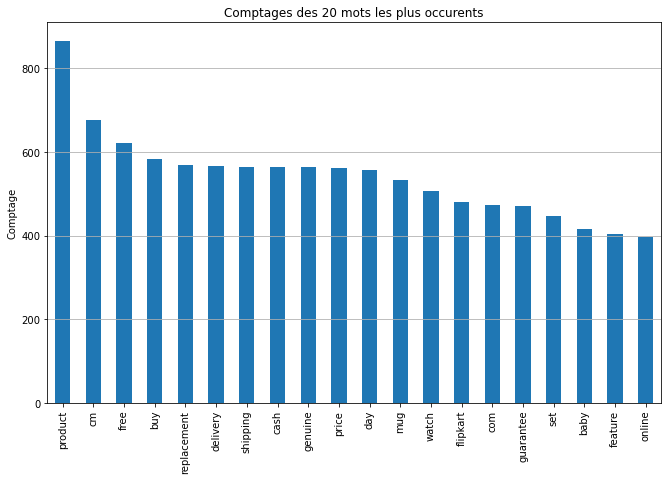

In [50]:
# Taille de la figure
plt.figure(figsize=(11,7))

# Bar plot des 20 mots les plus occurrents
word_occurences[:20].plot(kind='bar')

# Titre, label, grille et affichage
plt.title('Comptages des 20 mots les plus occurents')
plt.ylabel('Comptage')
plt.grid(axis='y')
plt.show()

Nous pouvons constater que parmi ces mots, certains peuvent nous donner une idée de la catégorie telle que "mug", "watch" et "baby".

Puisque nous avons de nombreuses dimensions (ici plus de 2000) nous allons appliquer une réduction en 2 dimensions à l'aide d'un t-SNE, afin de repérer les caractéristiques les plus intéressantes et diminuer le temps de traitement. Ensuite nous pourrons projeter nos points sur un graphique 2D grâce aux 2 composantes du t-SNE. Dans cet espace à 2 dimensions, nous allons notamment comparer la forme des points lorsque la couleur des points correspond aux catégories réelles et lorsqu'elle correspond aux clusters (déterminés par un k-means sur les composantes du t-SNE). Cette analyse graphique nous permettra d'évaluer la faisabilité de regrouper automatiquement des produits de même catégorie. En complément de notre analyse visuelle, nous allons calculer l'indice de Rand ajusté (ARI) c'est-à-dire une mesure de similarité, entre les catégories réelles et celles issues du clustering (k-means). Pour finir, nous examinerons la matrice de confusion entre les catégories réelles et les clusters afin de déterminer quelles sont les catégories qui sont les mieux prédites (c'est-à-dire celles qui sont les mieux regroupées automatiquement).

In [51]:
def tsne_matrix(matrix, k):
    """
    Renvoie un DataFrame ayant pour colonnes les 2 composantes d'un t-SNE (à 2 dimensions) et les clusters par k-means.
    Chaque ligne représente un individu.

    Positional arguments :
    -------------------------------------
    matrix : array-like : Matrice.
    k : int : Nombre de clusters à prédire.
    """
    
    # Instanciation du t-SNE
    tsne = TSNE(n_components=2, perplexity=30, random_state=1)
    
    # Réduction en 2 dimensions
    X_tsne = tsne.fit_transform(matrix)
    
    # Converion en DataFrame
    df_tsne = pd.DataFrame(X_tsne, columns=['tSNE_1', 'tSNE_2'])
    
    # Instanciation du k-means pour k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)

    # Entraînement du k-means
    kmeans.fit(X_tsne)

    # Enregistrement des étiquettes prédites
    df_tsne['clusters'] = kmeans.labels_
    
    return df_tsne

In [52]:
# Nombre de clusters
k = df['category'].nunique()

# Réduction des données en 2D et clustering
df_tsne = tsne_matrix(matrix=bag_of_words, k=k)
df_tsne.head()

tSNE_1     tSNE_2  clusters
0  16.463324  27.939632         3
1   5.963502  -6.840262         1
2   3.850105  -8.844917         1
3   5.668648  30.434349         5
4   5.718585  30.977821         5

In [53]:
def tsne_projection(df_tsne, labels_true):
    """
    Affiche la projection d'un t-SNE selon les vraies étiquettes et celle selon les étiquettes prédites.

    Positional arguments :
    -------------------------------------
    df_tsne : DataFrame : DataFrame renvoyé par la fonction "tsne_matrix(matrix, k)".
    labels_true : array-like : Les vraies étiquettes.
    """
    
    # Taille de la figure
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

    # Projection du t-SNE selon les vraies étiquettes
    sns.scatterplot(x=df_tsne['tSNE_1'], y=df_tsne['tSNE_2'],
                    hue=labels_true, palette='tab10', ax=axes[0])
    axes[0].set_title('tSNE projection according to real categories')
    axes[0].grid()

    # Projection du t-SNE selon les étiquettes prédites
    sns.scatterplot(data=df_tsne, x='tSNE_1', y='tSNE_2',
                    hue='clusters', palette='tab10', ax=axes[1])
    axes[1].set_title('tSNE projection according to clusters')
    axes[1].grid()

    # Affichage de la figure
    plt.show()

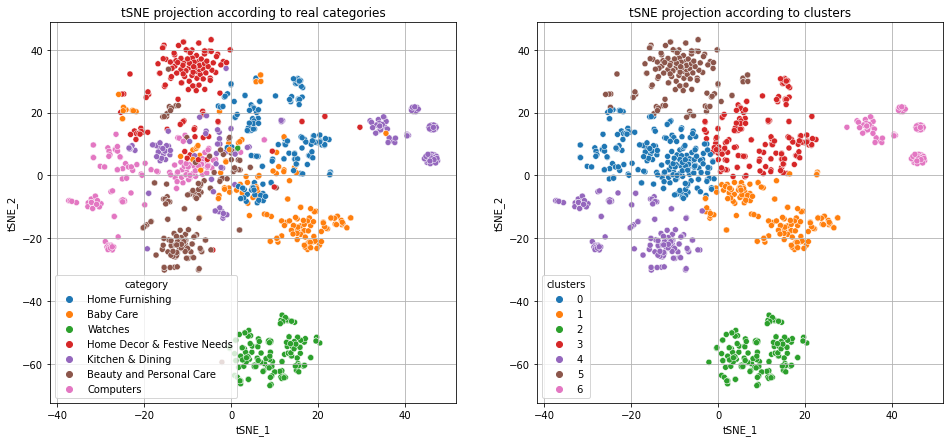

0.45940824014201687


In [54]:
# Représentation graphique des données réduites en 2D
tsne_projection(df_tsne=df_tsne, labels_true=df['category'])

# Enregistrement du score ARI
ari_ser.loc['BOW'] = adjusted_rand_score(df['category'], df_tsne['clusters'])
print(ari_ser['BOW'])

Dans cet espace à 2 dimensions, on constate que certaines catégories sont plus difficilement séparables que les autres. Le score ARI indique que la similarité entre les catégories réelles et les clusters est relativement faible. Néanmoins, l'analyse visuelle de la figure semble montrer que les catégories "Watches" et "Home Decor & Festive Needs" sont les mieux regroupables automatiquement.

In [55]:
def display_confusion_matrix(labels_true, labels_pred, figsize):
    """
    Affiche la matrice de confusion entre les catégories réelles et celles issues d'une segmentation en clusters.

    Positional arguments :
    -------------------------------------
    labels_true : array-like : Catégories réelles.
    labels_pred : array-like : Catégories issues d'une segmentation en clusters.
    figsize : tuple : Dimensions de la figure (largeur, hauteur) en pouces.
    """
    
    # Instanciation de l'encodeur
    le = LabelEncoder()

    # Conversion des catégories en étiquettes numériques
    y_true = le.fit_transform(labels_true)

    # Matrice de confusion
    cm = confusion_matrix(y_true=y_true, y_pred=labels_pred)
    cm = pd.DataFrame(data=cm,
                      index=le.inverse_transform(np.unique(y_true)),
                      columns=np.unique(y_true))

    # Taille de la figure
    plt.figure(figsize=figsize)

    # Carte de chaleur
    sns.heatmap(data=cm,
                cmap='viridis',
                annot=True,
                fmt='d',
                square=True)

    # Labels et affichage
    plt.ylabel('Categories')
    plt.xlabel('Clusters')
    plt.show()

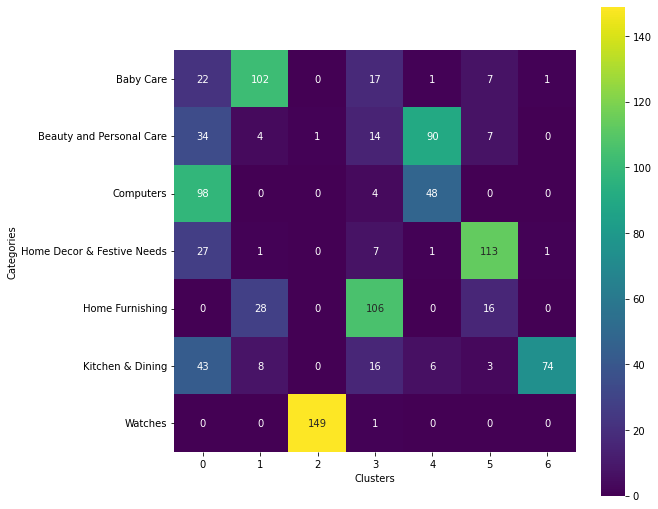

In [56]:
display_confusion_matrix(
    labels_true=df['category'], labels_pred=df_tsne['clusters'], figsize=(9, 9))

En supposant que le cluster 2 correspond à la catégorie "Watches", nous constatons que cette catégorie est très bien prédite. En effet, parmi les 150 produits de cette catégorie, seulement un produit a été mal classé. En ce qui concerne les produits des autres catégories, malgré quelques erreurs, ils semblent être majoritairement bien classés. Par conséquent, ici, les produits paraissent être regroupables automatiquement.

### 5.2.2. Tf-idf

In [57]:
# Instanciation du vectoriseur 
vectorizer = TfidfVectorizer(
    min_df=2)  # Les mots présents moins de 2 fois dans le corpus seront ignorés

# Vectorisation du corpus
X = vectorizer.fit_transform(doc_list)

# Conversion en DataFrame
tf_idf = pd.DataFrame(
    data=X.toarray(), columns=vectorizer.get_feature_names())
tf_idf.shape

(1050, 2074)

In [58]:
tf_idf.head()

aa  aapno  ability  able  abode  absorbency  absorbent  abstract   ac  \
0  0.0    0.0      0.0   0.0    0.0    0.000000        0.0  0.198651  0.0   
1  0.0    0.0      0.0   0.0    0.0    0.000000        0.0  0.000000  0.0   
2  0.0    0.0      0.0   0.0    0.0    0.068471        0.0  0.000000  0.0   
3  0.0    0.0      0.0   0.0    0.0    0.000000        0.0  0.000000  0.0   
4  0.0    0.0      0.0   0.0    0.0    0.000000        0.0  0.000000  0.0   

   accent  ...  yet  york  young  youth  youthful  yuva  zero  zipper  zone  \
0     0.0  ...  0.0   0.0    0.0    0.0       0.0   0.0   0.0     0.0   0.0   
1     0.0  ...  0.0   0.0    0.0    0.0       0.0   0.0   0.0     0.0   0.0   
2     0.0  ...  0.0   0.0    0.0    0.0       0.0   0.0   0.0     0.0   0.0   
3     0.0  ...  0.0   0.0    0.0    0.0       0.0   0.0   0.0     0.0   0.0   
4     0.0  ...  0.0   0.0    0.0    0.0       0.0   0.0   0.0     0.0   0.0   

   zyxel  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  

[5 rows x 2074 columns]

Comme pour le bag-of-words (BOW), nous obtenons de nouveau une matrice très creuse.

In [59]:
# Réduction des données en 2D et clustering
df_tsne = tsne_matrix(matrix=tf_idf, k=k)
df_tsne.head()

tSNE_1     tSNE_2  clusters
0 -13.494637 -21.611551         0
1   3.975823 -14.733347         5
2   2.418681 -11.835367         1
3 -22.808680 -18.304514         0
4 -23.082907 -18.672001         0

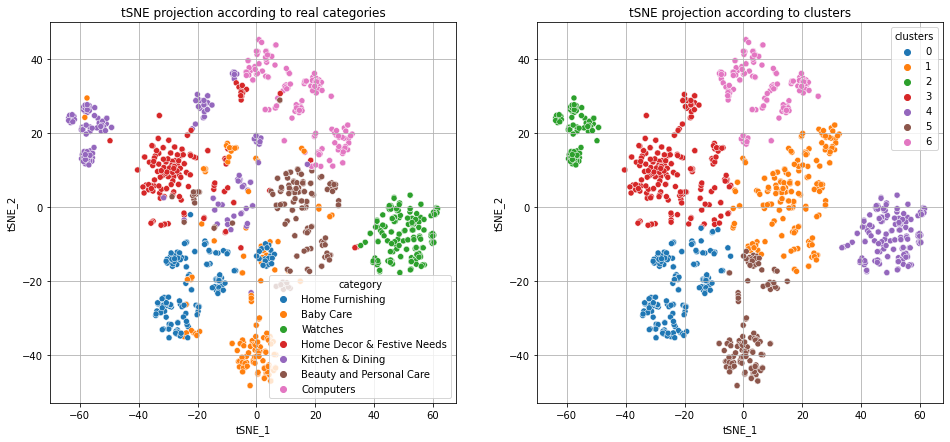

0.5633224617688012


In [60]:
# Représentation graphique des données réduites en 2D
tsne_projection(df_tsne=df_tsne, labels_true=df['category'])

# Enregistrement du score ARI
ari_ser.loc['Tf-idf'] = adjusted_rand_score(df['category'], df_tsne['clusters'])
print(ari_ser['Tf-idf'])

L'approche Tf-idf d'améliorer le score ARI par rapport à l'approche BOW. En effet, ici les catégories semblent être mieux linéairement séparables. De nouveau, la catégorie "Watches" paraît être la plus facile à regrouper automatiquement.

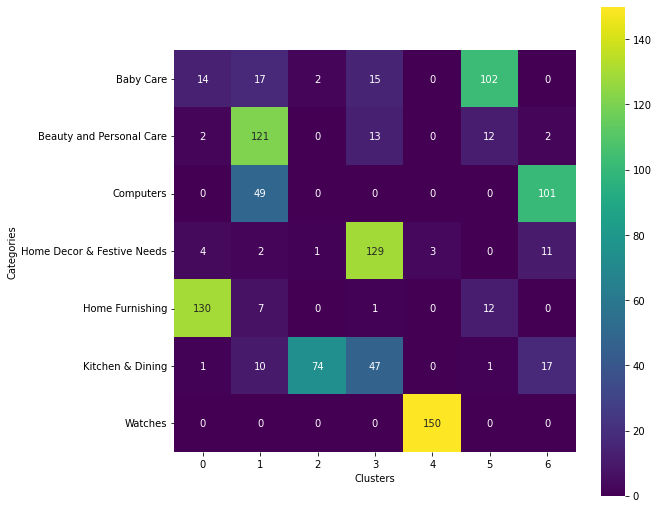

In [61]:
display_confusion_matrix(
    labels_true=df['category'], labels_pred=df_tsne['clusters'], figsize=(9, 9))

En supposant que le cluster 3 correspond à la catégorie "Watches", on note que tous les produits de cette catégorie ont été bien classé par la segmentation. En ce qui concerne les produits des autres catégories, malgré quelques erreurs, ils semblent être majoritairement bien classés. Par conséquent, ici, les produits paraissent être regroupables automatiquement.

### 5.2.3. Word2Vec

In [62]:
# Instanciation du modèle Word2Vec
w2v_model = gensim.models.Word2Vec(min_count=2,  # Les mots présents moins de 2 fois dans le corpus seront ignorés
                                   vector_size=300,
                                   window=7,
                                   workers=1,
                                   seed=1)

# Construction du vocabulaire
w2v_model.build_vocab(tokens_list)

# Entraînement du modèle
w2v_model.train(tokens_list, total_examples=w2v_model.corpus_count, epochs=100)

# Affichage de la taille du vocabulaire
print('Taille du vocabulaire :', len(w2v_model.wv.index_to_key))

Taille du vocabulaire : 3476


In [63]:
# Liste vide pour enregistrer les documents vectorisés
docs_vec = []

# Vectorisation des documents
for tokens in tokens_list:
    zero_vector = np.zeros(w2v_model.vector_size)
    vectors = []
    for token in tokens:
        if token in w2v_model.wv:
            try:
                vectors.append(w2v_model.wv[token])
            except KeyError:
                continue
    if vectors:
        vectors = np.asarray(vectors)
        avg_vec = vectors.mean(axis=0)
        docs_vec.append(avg_vec)
    else:
        docs_vec.append(zero_vector)

# Conversion des documents vectorisés en matrice
docs_vec_mat = np.asarray(docs_vec)
docs_vec_mat.shape

(1050, 300)

In [64]:
# Réduction des données en 2D et clustering
df_tsne = tsne_matrix(matrix=docs_vec_mat, k=k)
df_tsne.head()

tSNE_1     tSNE_2  clusters
0 -5.858570 -31.028172         5
1  5.734039 -31.477842         6
2  6.287759 -31.201759         6
3  1.617285 -30.926683         6
4  1.663606 -30.313623         6

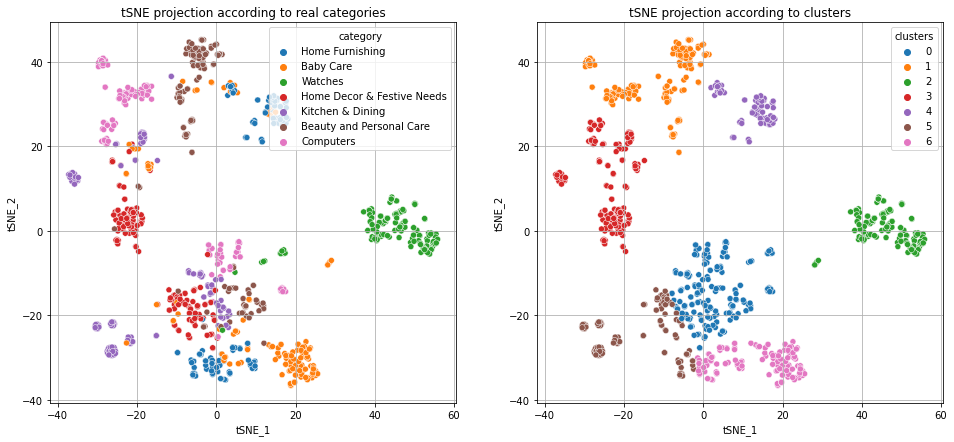

0.357505377699075


In [65]:
# Représentation graphique des données réduites en 2D
tsne_projection(df_tsne=df_tsne, labels_true=df['category'])

# Enregistrement du score ARI
ari_ser.loc['Word2Vec'] = adjusted_rand_score(df['category'], df_tsne['clusters'])
print(ari_ser['Word2Vec'])

Le score ARI est assez faible. L'analyse visuelle de la figure suggère que la catégorie "Watches" est celle qui est la plus facile à séparer linéairement.

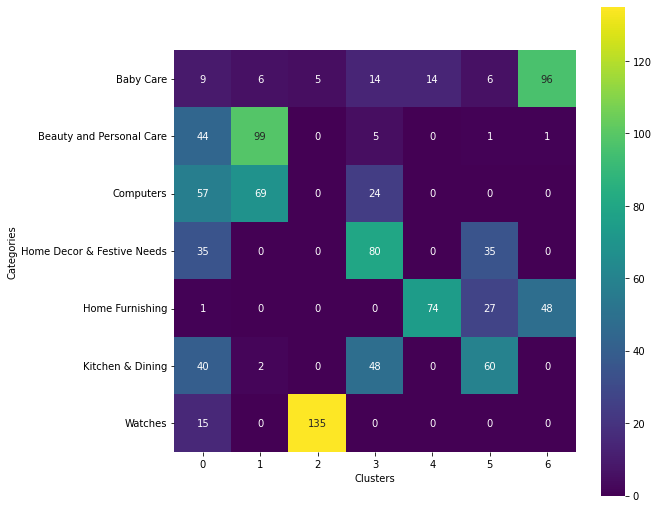

In [66]:
display_confusion_matrix(
    labels_true=df['category'], labels_pred=df_tsne['clusters'], figsize=(9, 9))

Effectivement, la catégorie "Watches" semble être celle qui est la mieux prédite (en supposant que le cluster 2 correspond à cette catégorie). Les produits de cette catégorie sont regroupables automatiquement malgré quelques erreurs de classement. Cependant les produits de certaines catégories telles que "Computers" et "Kitchen & Dining" ont l'air d'être en grande partie mal classés. Par conséquent, ici, les produits de certaines catégories paraissent être difficilement regroupables automatiquement.

### 5.2.4. BERT

Ici, nous allons utiliser le modèle BERT (Bidirectional Encoder Representations from Transformers) qui est un réseau de neurones. Nous utiliserons plus précisément le modèle "BERT-Base, Uncased" dont l'architecture est la suivante :
- 12 couches
- couche cachée (feedforward) de dimension 768
- 12 têtes d'attention

Ce modèle a été pré-entraîné pour la langue anglaise sur Wikipedia et BooksCorpus. De plus, les entrées de textes ont été normalisées. Les textes ont notamment été mis en minuscule.

In [67]:
# Instanciation du modèle de prétraitement de texte pour BERT
bert_preprocess_model = hub.KerasLayer(
    'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')

# Prétraitement de texte
text_preprocessed = bert_preprocess_model(doc_list)

# Instanciation du modèle BERT
bert_model = hub.KerasLayer(
    'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4',
    trainable=True)

# Sorties du modèle BERT
bert_results = bert_model(text_preprocessed)

# Représentation de chaque document par un vecteur
pooled_output = bert_results["pooled_output"]
pooled_output.shape

TensorShape([1050, 768])

In [68]:
# Réduction des données en 2D et clustering
df_tsne = tsne_matrix(matrix=pooled_output, k=k)
df_tsne.head()

tSNE_1     tSNE_2  clusters
0 -47.654675  17.246508         4
1 -11.092808 -20.289629         2
2 -53.495811  18.466642         4
3  -4.063616 -19.118902         3
4 -30.573320  23.276602         4

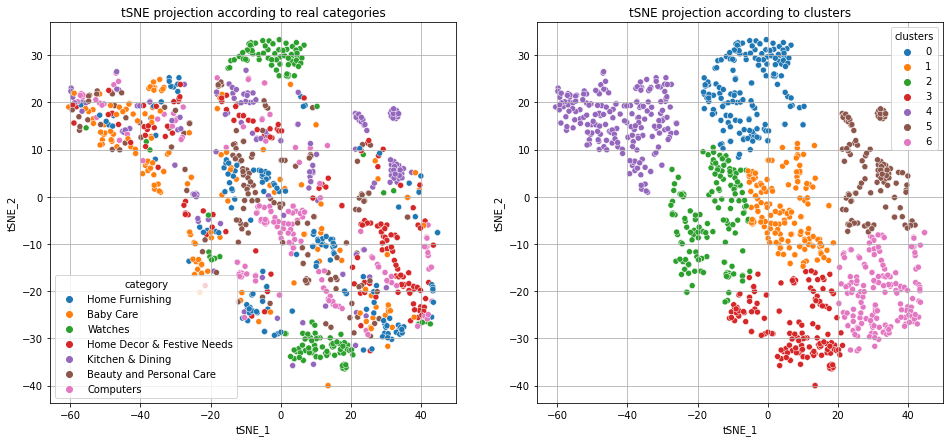

0.09866627067581445


In [69]:
# Représentation graphique des données réduites en 2D
tsne_projection(df_tsne=df_tsne, labels_true=df['category'])

# Enregistrement du score ARI
ari_ser.loc['BERT'] = adjusted_rand_score(df['category'], df_tsne['clusters'])
print(ari_ser['BERT'])

La projection des points selon les catégories réelles nous indique que les produits sont très difficilement séparables (de manière linéaire). De plus, le score ARI est très faible.

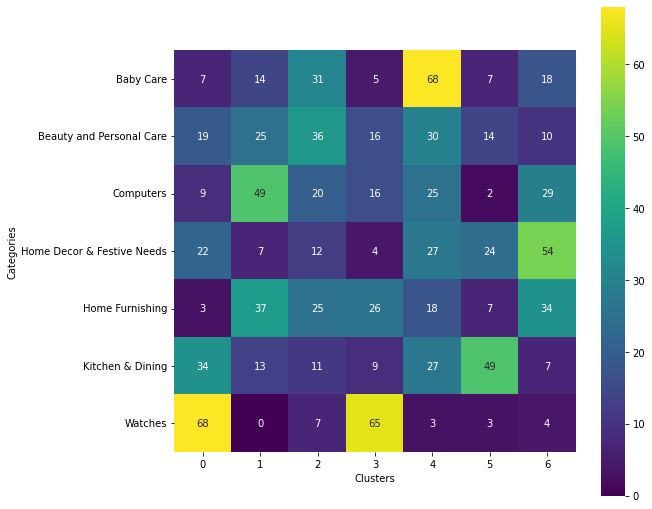

In [70]:
display_confusion_matrix(
    labels_true=df['category'], labels_pred=df_tsne['clusters'], figsize=(9, 9))

Sur cette matrice de confusion, il est compliqué de déterminer quel cluster correspond à quelle catégorie. Effectivement, les produits de chaque catégorie sont dispersés dans plusieurs clusters. Alors beaucoup de ces produits sont mal classés. Par conséquent, ici, les produits ne paraissent pas être regroupables automatiquement.

### 5.2.5. USE

USE (Universal Sentence Encoder) permet de transformer un texte en un vecteur de dimension 512. Il s'agit d'un modèle  qui a été entrainé et optimisé pour les textes ayant plus d'un mot.

In [71]:
# Instanciation du modèle USE
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

# Vectorisation des documents
embeddings = embed(doc_list)
embeddings.shape

TensorShape([1050, 512])

In [72]:
# Réduction des données en 2D et clustering
df_tsne = tsne_matrix(matrix=embeddings, k=k)
df_tsne.head()

tSNE_1     tSNE_2  clusters
0   4.551275  25.615377         4
1  22.832062  20.277384         6
2  22.307001  19.540987         6
3   7.904243  22.622713         4
4   7.872926  22.416876         4

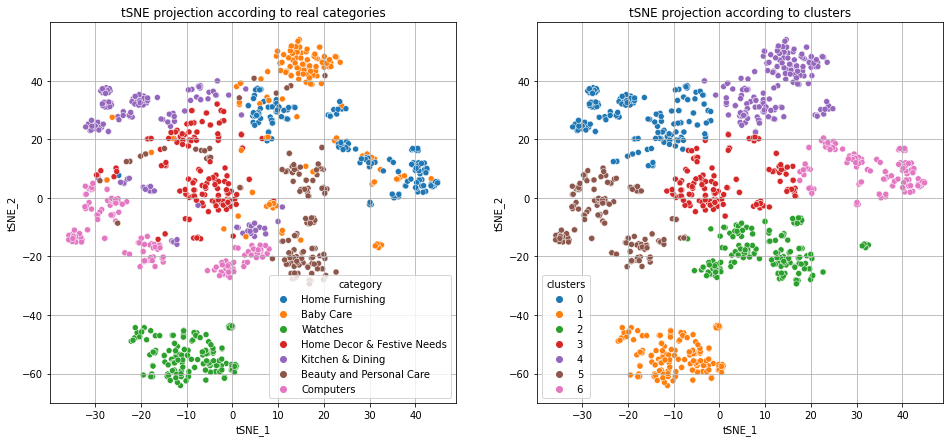

0.4546963779102748


In [73]:
# Représentation graphique des données réduites en 2D
tsne_projection(df_tsne=df_tsne, labels_true=df['category'])

# Enregistrement du score ARI
ari_ser.loc['USE'] = adjusted_rand_score(df['category'], df_tsne['clusters'])
print(ari_ser['USE'])

Il est difficile de séparer linéairement certaines catégories. Cependant, nous pouvons voir que les points de la catégorie "Watches" se démarquent très nettement des autres points. En effet, ces points sont plus ou moins resserrés entre eux et ne se mélangent pas avec les points des autres catégories. En ce qui concerne le score ARI, il est relativement faible.

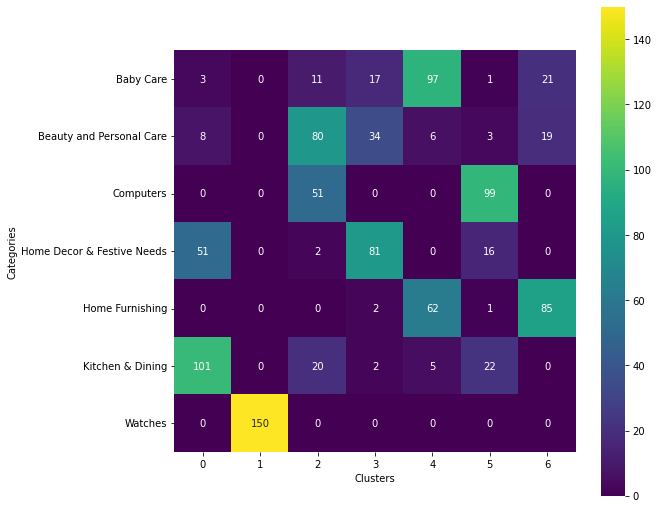

In [74]:
display_confusion_matrix(
    labels_true=df['category'], labels_pred=df_tsne['clusters'], figsize=(9, 9))

La matrice de confusion corrobore nos observations. En effet, les produits qui sont segmentés sans erreur de classement sont ceux de la catégories "Watches". En ce qui concerne les produits des autres catégories, ils semblent être majoritairement bien classés, malgrés des erreurs de classement plus ou moins importantes. Par conséquent, ici, les produits paraissent être regroupables automatiquement.

### 5.2.6. Synthèse

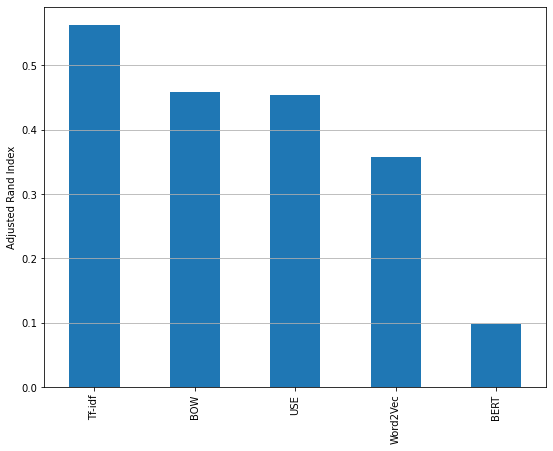

In [75]:
# Bar plot des scores ARI
ari_ser.sort_values(ascending=False).plot(kind='bar', figsize=(9, 7))

# Label et affichage
plt.ylabel('Adjusted Rand Index')
plt.grid(axis='y')
plt.show()

Nous avons vu qu'il était possible de regrouper automatiquement des produits de même catégorie, notamment par les approches :
- Tf-idf
- BOW
- USE

L'approche Tf-idf a donné les meilleurs résultats. En effet, elle a le score ARI le plus important, parmi les différentes approches essayées. Cela veut dire que pour cette approche, les catégories issues d'une segmentation en clusters sont les plus similaires aux catégories réelles. D'ailleurs, les produits de la catégorie "Watches" furent tous bien classés.

# 6. Images - Feature extraction et analyse

## 6.1. SIFT

Nous allons réaliser une extraction de features de type "bag-of-images" via la génération de descripteurs à l'aide de l'algorithme SIFT (Scale-Invariant Feature Transform). Cet algorithme a l'avantage de pouvoir repérer les mêmes éléments visuels dans plusieurs images, même lorsqu'ils ont des orientations et des échelles différentes.

In [76]:
# Instanciation du modèle SIFT
sift = cv2.SIFT_create(500)

Dans le but de faciliter l'extraction de features, nous allons appliquer quelques traitements aux images. Testons ces opérations sur la première image du jeu de données à titre d'exemple.

**Essai sur une image**

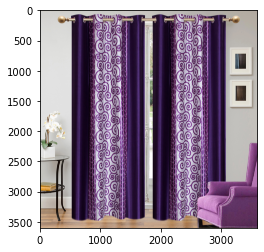

In [77]:
# Première image sans traitement
img = plt.imread(df['image_path'][0])
plt.imshow(img)

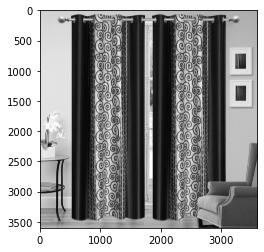

In [78]:
# Conversion de l'image en niveaux de gris
img = cv2.imread(df['image_path'][0], cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

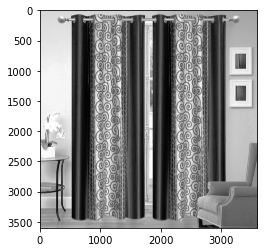

In [79]:
# Egalisation de l'histogramme
img = cv2.equalizeHist(img)
plt.imshow(img, cmap='gray')

L'égalisation d'histogramme permet de réajuster le contraste d'une image.

(500, 128)


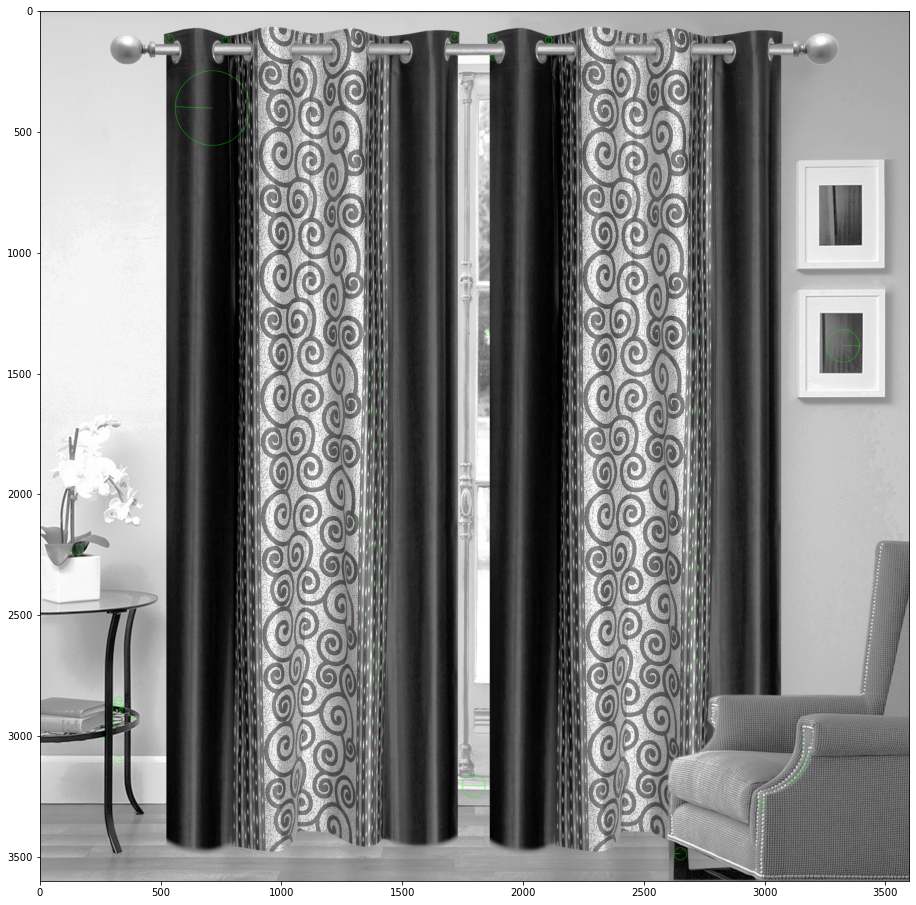

In [80]:
# Détection des points d'intérêt et calcul des descripteurs
kp, des = sift.detectAndCompute(img, None)

# Représentation des points d'intérêt sur l'image
img = cv2.drawKeypoints(img, kp, img, 
                        color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(16, 16))
plt.imshow(img, cmap='gray')
print(des.shape)

Sur cette image, notre modèle SIFT a créé 500 descripteurs (de dimension 128). Un descripteur est un vecteur décrivant le voisinage de la feature à laquelle il est associé. Ici, une feature est une zone circulaire dont le centre est un point d'intérêt, et dont le rayon est proportionnel à son échelle caractéristique. D'ailleurs, comme nous pouvons le voir sur l'image ci-dessus, les rayons peuvent varier d'une feature à l'autre.

**Totalité des images**

In [81]:
def descriptors(sift, images):
    # Liste de vide pour enregistrer les descripteurs par image
    des_per_img = []
    
    for i in images:
        # Conversion de l'image en niveaux de gris
        img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
        
        # Egalisation de l'histogramme
        img = cv2.equalizeHist(img)
        
        # Détection des points d'intérêt et calcul des descripteurs
        kp, des = sift.detectAndCompute(img, None)
        
        # Enregistrement des descripteurs
        des_per_img.append(des)
        
    # Conversion de la liste des descripteurs en array
    des_per_img = np.array(des_per_img)

    # Array de l'ensemble des descripteurs pour utilisation du k-means
    des_all = np.concatenate(des_per_img, axis=0)
    
    return des_per_img, des_all

In [82]:
des_per_img, des_all = descriptors(sift=sift, images=df['image_path'])

print('Nombre total de descripteurs :', des_all.shape[0])
print("Longueur d'un descripteur :", des_all.shape[1])

C:\Users\mauri\.conda\envs\pro6\lib\site-packages\ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Nombre total de descripteurs : 517351
Longueur d'un descripteur : 128


Afin d'identifier les éléments visuels communs (ou différents) entre les images, nous allons réaliser un clustering sur l'ensemble des descripteurs. Ensuite pour chaque image, nous allons construire un histogramme représentant un comptage du nombre de descripteurs dans chaque cluster.

Alors, nous allons commencer par segmenter les descripteurs à l'aide d'un mini batch k-means pour obtenir des temps de traitement raisonnables et des résultats proches du k-means. Pour déterminer le nombre de clusters, nous allons simplement multiplier le nombre de catégories par 10 (rule of thumb). Ensuite, nous pourrons construire un histogramme pour chaque image à l'aide des clusters établis.

In [83]:
def hist_per_img(des_per_img, des_all, k):
    # k-means
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=1)
    
    # Entraînement du k-means
    kmeans.fit(des_all)
    
    # Liste vide pour enregistrer l'histogramme de chaque image
    hist_per_img = []
    
    # Construction de l'histogramme pour chaque image (à partir des descripteurs)
    for des in des_per_img:
        # Enregistrement des clusters
        clusters = kmeans.predict(des)
        
        # Création de l'histogramme de longueur équivalente au nombre total de clusters
        hist = np.zeros(len(kmeans.cluster_centers_))
        
        # Pour chaque cluster, compte le nombre de descripteurs
        for i in clusters:
            hist[i] += 1.0/len(des)
            
        # Enregistrement de l'histogramme
        hist_per_img.append(hist)
        
    # Conversion de la liste des histogrammes en array
    hist_per_img = np.array(hist_per_img)
    
    return hist_per_img

In [84]:
# Nombre de clusters = Nombre de catégories x 10
k = df['category'].nunique()*10

# Histogramme par image
hist_per_img = hist_per_img(des_per_img=des_per_img, des_all=des_all, k=k)
hist_per_img.shape

C:\Users\mauri\.conda\envs\pro6\lib\site-packages\sklearn\cluster\_kmeans.py:888: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  f"MiniBatchKMeans is known to have a memory leak on "


(1050, 70)

Désormais, effectuons une réduction en 2D et segmentons les points dans ce nouvel espace :

In [85]:
# Nombre de clusters équivalent au nombre de catégories
k = df['category'].nunique()

# Réduction des données en 2D et clustering
df_tsne = tsne_matrix(matrix=hist_per_img, k=k)
df_tsne.head()

tSNE_1     tSNE_2  clusters
0  -6.844810   4.749021         0
1 -19.201307  15.176062         6
2  27.200417  17.572067         3
3 -25.486624  11.310299         4
4 -19.977907  13.945501         6

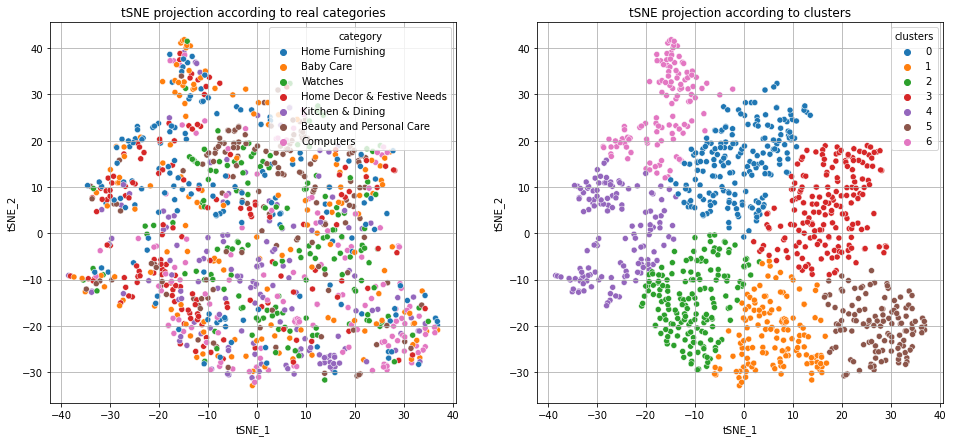

0.05042493032221039


In [86]:
# Représentation graphique des données réduites en 2D
tsne_projection(df_tsne=df_tsne, labels_true=df['category'])

# Enregistrement du score ARI
ari_ser.loc['SIFT'] = adjusted_rand_score(df['category'], df_tsne['clusters'])
print(ari_ser['SIFT'])

Le score ARI est proche de 0, ce qui suggère que les points des différentes catégories sont aléatoirement répartis dans les différents clusters. En effet, l'analyse visuelle nous montre qu'il n'est pas possible de séparer linéairement une catégorie de l'autre.

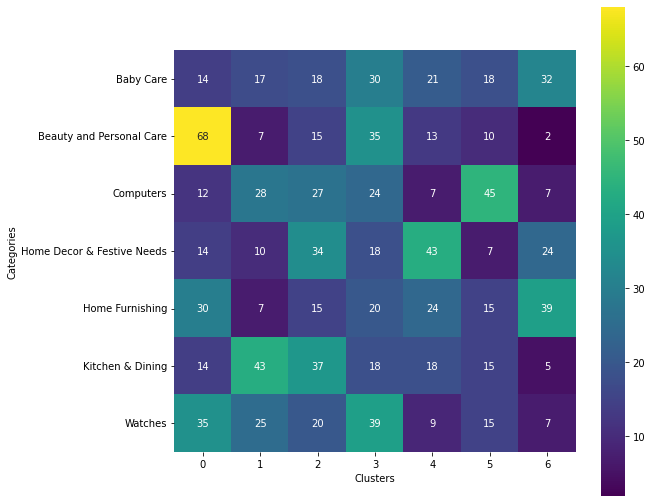

In [87]:
display_confusion_matrix(
    labels_true=df['category'], labels_pred=df_tsne['clusters'], figsize=(9, 9))

En outre, la matrice de confusion ne nous permet pas de relier avec certitude un cluster à une catégorie. Par conséquent, ici, les produits ne paraissent pas être regroupables automatiquement.

## 6.2. CNN Transfer Learning

**Création du modèle pré-entraîné**

In [88]:
# Chargement du modèle VGG-16 pré-entraîné sur ImageNet
base_model = VGG16()

# Retrait de la dernière couche (couche de prédictions)
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

**Création des features des images**

In [89]:
def img_feat(vgg16, images):
    # Liste vide pour enregistrer les images converties en vecteurs par notre modèle
    img_feat = []

    for i in images:
        # Chargement et redimensionnement de l'image
        img = load_img(i, target_size=(224, 224))

        # Conversion en array (numpy)
        img = img_to_array(img)

        # Création de la collection d'images
        img = img.reshape(
            (1,  # Nombre d'images
             img.shape[0],  # Largeur
             img.shape[1],  # Hauteur
             img.shape[2])  # Profondeur
        )

        # Prétraitement de l'image comme le veut VGG-16
        img = preprocess_input(img)

        # Enregistrement de la classe de l'image
        img_feat.append(vgg16.predict(img)[0])

    # Conversion de la liste en array
    img_feat = np.array(img_feat)
    
    return img_feat

In [90]:
img_feat = img_feat(vgg16=model, images=df['image_path'])

img_feat.shape

C:\Users\mauri\.conda\envs\pro6\lib\site-packages\PIL\Image.py:2914: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


(1050, 4096)

In [91]:
# Réduction des données en 2D et clustering
df_tsne = tsne_matrix(matrix=img_feat, k=k)
df_tsne.head()

tSNE_1     tSNE_2  clusters
0 -25.222822 -21.596550         3
1 -23.011675  16.047632         4
2 -24.629995   9.814887         4
3 -31.411863 -18.144882         3
4 -31.919744 -27.952248         3

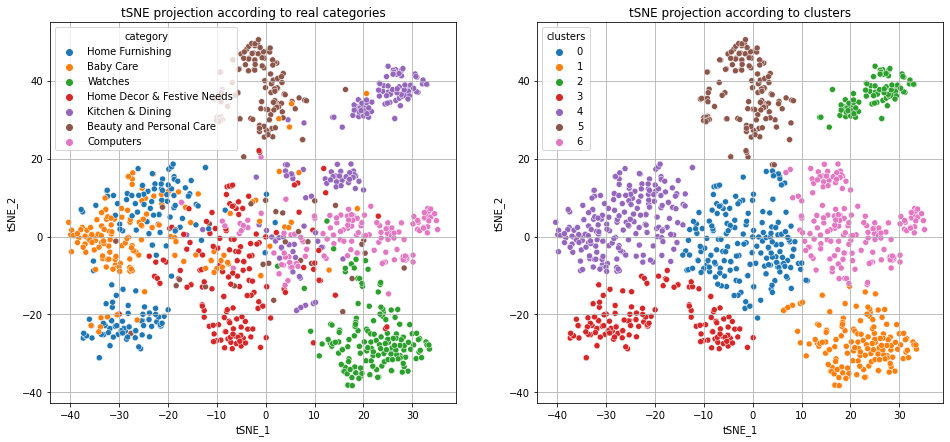

0.44160918951278516


In [92]:
# Représentation graphique des données réduites en 2D
tsne_projection(df_tsne=df_tsne, labels_true=df['category'])

# Enregistrement du score ARI
ari_ser.loc['CNN'] = adjusted_rand_score(df['category'], df_tsne['clusters'])
print(ari_ser['CNN'])

Nous remarquons que certaines catégories sont plus difficilement séparables que les autres, dans cet espace à 2 dimensions. Le score ARI indique que la similarité entre les catégories réelles et les clusters est relativement faible. Cependant, l'analyse visuelle de la figure semble montrer que les catégories "Watches" et "Beauty and Personal Care" sont les mieux regroupables automatiquement.

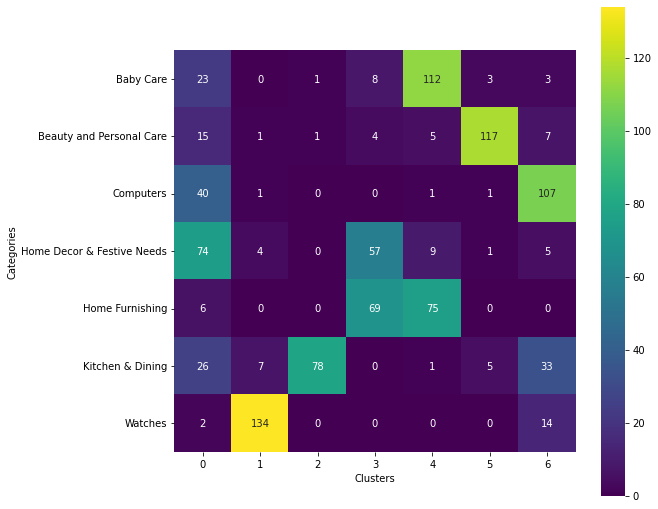

In [93]:
display_confusion_matrix(
    labels_true=df['category'], labels_pred=df_tsne['clusters'], figsize=(9, 9))

Effectivement, la matrice de confusion suggère que les produits des catégories "Watches" et "Beauty and Personal Care" sont les mieux classés. Au contraire, les produits qui sont le plus mal classés sont ceux des catégories "Home Decor & Festive Needs", "Home Furnishing" et "Kitchen & Dining". Néanmoins, malgré les erreurs de classement, les produits paraissent être regroupables automatiquement.

## 6.3. Synthèse

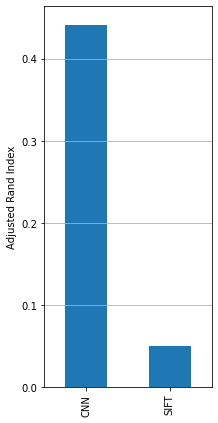

In [94]:
# Bar plot des scores ARI
ari_ser[['SIFT', 'CNN']].sort_values(ascending=False).plot(kind='bar', figsize=(3, 7))

# Label et affichage
plt.ylabel('Adjusted Rand Index')
plt.grid(axis='y')
plt.show()

Nous avons vu qu'il était possible de regrouper automatiquement des produits de même catégorie grâce à un algorithme de type CNN Transfer Learning. En outre, parmi les deux algorithmes essayés, ce modèle a donné les meilleurs résultats. En effet, il a le score ARI le plus élevé.

# 7. Conclusion

Que ce soit à partir d'une extraction de features texte ou d'une extraction de features image, nous avons vu qu'il était faisable de regrouper automatiquement des produits de même catégorie. Cependant, les approches ayant donné les meilleurs résultats ont tout de même un score ARI relativement faible. Mais il est très probablement possible d'améliorer le score ARI en optimisant certains hyperparamètres tels que la perplexité pour le t-SNE.